In [1]:
import sys
import warnings
from data_class import patient
import pickle
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from MIMIC_IV_HAIM_API import get_single_chest_xray_embeddings
import torchxrayvision as xrv

sys.path.append("../")
warnings.filterwarnings("ignore")

C:\Users\herpy\anaconda3\Lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
C:\Users\herpy\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
subject_id = 10011365
with open("./sample_patient/%s.pkl"%(subject_id), "rb") as f:
    data = pickle.load(f)
cxr_img = data.cxr_img

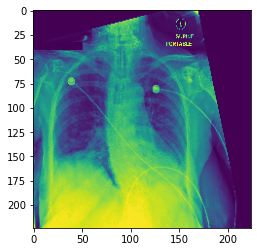

In [3]:
plt.imshow(cxr_img)
plt.show()

In [4]:
densefeature_embeddings, prediction_embeddings = get_single_chest_xray_embeddings(cxr_img)

(1024,)


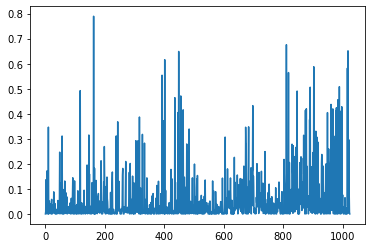

In [5]:
print(densefeature_embeddings.shape)
plt.plot(densefeature_embeddings)

In [6]:
#print(prediction_embeddings.shape)
pathologies = xrv.datasets.default_pathologies
pathologies_prediction = pd.DataFrame({"pathologies":pathologies, "prediction":prediction_embeddings})
pathologies_prediction.sort_values(by = ["prediction"], ascending=False)

,pathologies,prediction
16,Lung Opacity,0.834243
7,Effusion,0.815207
0,Atelectasis,0.800733
4,Edema,0.774746
1,Consolidation,0.700741
8,Pneumonia,0.560691
15,Fracture,0.527548
10,Cardiomegaly,0.519721
11,Nodule,0.500000
13,Hernia,0.500000
